In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, GlobalMaxPooling1D, MaxPool2D, SimpleRNN, Flatten, BatchNormalization,Activation, Conv2D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv(r"heart.csv",sep=",")
df = df.drop(columns = ['exang','fbs','restecg', 'ca', 'thal', 'slope'])
df.head()

,age,sex,cp,trestbps,chol,thalach,oldpeak,target
0,63,1,3,145,233,150,2.3,1
1,37,1,2,130,250,187,3.5,1
2,41,0,1,130,204,172,1.4,1
3,56,1,1,120,236,178,0.8,1
4,57,0,0,120,354,163,0.6,1


In [3]:
scaler = StandardScaler()
scaler.fit(df.drop('sex', axis=1))
scaled_features = pd.DataFrame(scaler.transform(df.drop('sex', axis=1)),columns=df.columns[:-1])
scaled_features.head()

,age,sex,cp,trestbps,chol,thalach,oldpeak
0,0.952197,1.973123,0.763956,-0.256334,0.015443,1.087338,0.914529
1,-1.915313,1.002577,-0.092738,0.072199,1.633471,2.122573,0.914529
2,-1.474158,0.032031,-0.092738,-0.816773,0.977514,0.310912,0.914529
3,0.180175,0.032031,-0.663867,-0.198357,1.239897,-0.206705,0.914529
4,0.290464,-0.938515,-0.663867,2.082050,0.583939,-0.379244,0.914529


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features, df['chol'], random_state=0)

In [9]:
model = Sequential()
model.add(Dense(20, input_dim=7, activation='relu'))
model.add(Dense(10, input_dim=7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                160       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X_train, Y_train, epochs=30)

Epoch 1/30
8/8 [==============================] - 1s 2ms/step - loss: -66.3410 - accuracy: 0.0000e+00
Epoch 2/30
8/8 [==============================] - 0s 2ms/step - loss: -97.8559 - accuracy: 0.0000e+00
Epoch 3/30
8/8 [==============================] - 0s 2ms/step - loss: -133.5390 - accuracy: 0.0000e+00
Epoch 4/30
8/8 [==============================] - 0s 2ms/step - loss: -172.9171 - accuracy: 0.0000e+00
Epoch 5/30
8/8 [==============================] - 0s 2ms/step - loss: -216.3749 - accuracy: 0.0000e+00
Epoch 6/30
8/8 [==============================] - 0s 2ms/step - loss: -264.9099 - accuracy: 0.0000e+00
Epoch 7/30
8/8 [==============================] - 0s 2ms/step - loss: -322.1568 - accuracy: 0.0000e+00
Epoch 8/30
8/8 [==============================] - 0s 2ms/step - loss: -386.2280 - accuracy: 0.0000e+00
Epoch 9/30
8/8 [==============================] - 0s 2ms/step - loss: -461.3345 - accuracy: 0.0000e+00
Epoch 10/30
8/8 [==============================] - 0s 2ms/step - loss: -548

In [12]:
Y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(Y_test, Y_pred), '\n', classification_report(Y_test, Y_pred))

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]] 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
         126       0.00      0.00      0.00       1.0
         167       0.00      0.00      0.00       1.0
         174       0.00      0.00      0.00       1.0
         175       0.00      0.00      0.00       1.0
         185       0.00      0.00      0.00       1.0
         192       0.00      0.00      0.00       2.0
         197       0.00      0.00      0.00       1.0
         198       0.00      0.00      0.00       1.0
         199       0.00      0.00      0.00       2.0
         201       0.00      0.00      0.00       1.0
         203       0.00      0.00      0.00       1.0
         204       0.00      0.00      0.00       2.0
         206       0.00      0.00      0.00       1.0
         211       0.00      0.00      0.00       1.0
         212 

d:\py\5course\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\py\5course\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\py\5course\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\py\5course\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: Und

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import glob
import tqdm
import tensorflow

from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

%matplotlib inline

In [15]:
generator = ImageDataGenerator()
batches   = generator.flow_from_directory('Training')

Found 6231 images belonging to 24 classes.


In [16]:
indices = batches.class_indices

labels  = list(indices.keys())
labels

['apple_6',
 'apple_braeburn_1',
 'apple_crimson_snow_1',
 'apple_golden_1',
 'apple_golden_2',
 'apple_golden_3',
 'apple_granny_smith_1',
 'apple_hit_1',
 'apple_pink_lady_1',
 'apple_red_1',
 'apple_red_2',
 'apple_red_3',
 'apple_red_delicios_1',
 'apple_red_yellow_1',
 'apple_rotten_1',
 'cabbage_white_1',
 'carrot_1',
 'cucumber_1',
 'cucumber_3',
 'eggplant_violet_1',
 'pear_1',
 'pear_3',
 'zucchini_1',
 'zucchini_dark_1']

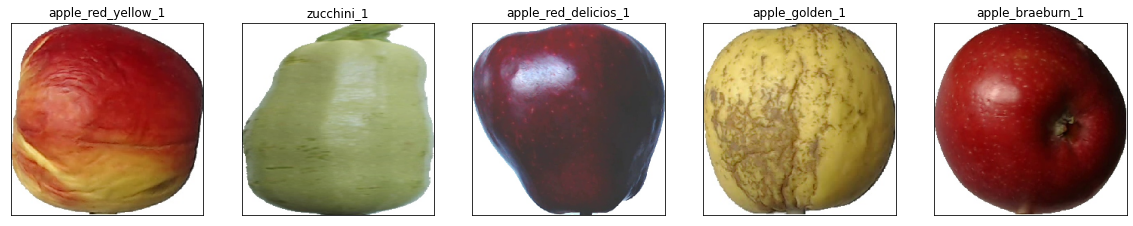

In [17]:
for X, y in batches:
    fig, ax = plt.subplots(1, 5, figsize=(20, 20))
    
    for i in range(0,5):
        img = X[i].astype('int')
        label = labels[np.argmax(y[i])]
        ax[i].imshow(img)
        ax[i].set_title(label)
        ax[i].set_xticks([])
        ax[i].set_yticks([])

    
    plt.show()
    break # We only need the first batch

In [18]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=30,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1/255)

test_datagen  = ImageDataGenerator(rescale = 1/255)

In [19]:
train_directory = 'Training'
val_directory   = 'Validation'
test_directory  = 'Test'

In [20]:
train_generator=train_datagen.flow_from_directory(train_directory,
                                                  target_size=(224,224),
                                                  color_mode='rgb',
                                                  class_mode='sparse',
                                                  batch_size=256)

Found 6231 images belonging to 24 classes.


In [21]:
val_generator=valid_datagen.flow_from_directory(val_directory,
                                               target_size=(224,224),
                                               color_mode='rgb',
                                               class_mode='sparse',
                                               batch_size=256)

Found 3114 images belonging to 24 classes.


In [22]:
test_gemerator=test_datagen.flow_from_directory(test_directory,
                                                target_size=(224,224),
                                                color_mode='rgb',
                                                class_mode='sparse',
                                                batch_size=256)

Found 3110 images belonging to 24 classes.


In [28]:
# Model Initialization

from keras.applications.resnet import ResNet101

convlayer = ResNet101(input_shape=(224,224,3),
                        weights='imagenet',
                        include_top=False)

171458560/171446536 [==============================] - 27s 0us/step


In [29]:
# Freezing Layers

for layer in convlayer.layers:
    layer.trainable=False

In [30]:
# Building Model

model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(250,activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 7, 7, 2048)        42658176  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 batch_normalization (BatchN  (None, 100352)           401408    
 ormalization)                                                   
                                                                 
 dense_6 (Dense)             (None, 2048)              205522944 
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                      

In [31]:
# Model Compile

opt=tensorflow.keras.optimizers.Adam(lr=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=opt)

d:\py\5course\venv\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [32]:
# Define Callbacks 

filepath = './best_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_accuracy', 
                              mode = 'max' , 
                              patience = 10,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_accuracy', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)

callback_list = [earlystopping, checkpoint]

In [33]:
model_history=model.fit(train_generator,
                        validation_data=val_generator,
                        epochs = 5,
                        callbacks = callback_list,
                        verbose = 1)

Epoch 1/5
25/25 [==============================] - ETA: 0s - loss: 2.9860 - accuracy: 0.2186 
Epoch 00001: val_accuracy improved from -inf to 0.22351, saving model to .\best_weights.hdf5


d:\py\5course\venv\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


25/25 [==============================] - 1209s 49s/step - loss: 2.9860 - accuracy: 0.2186 - val_loss: 2.5722 - val_accuracy: 0.2235
Epoch 2/5
25/25 [==============================] - ETA: 0s - loss: 1.9638 - accuracy: 0.3731 
Epoch 00002: val_accuracy improved from 0.22351 to 0.29287, saving model to .\best_weights.hdf5
25/25 [==============================] - 1294s 53s/step - loss: 1.9638 - accuracy: 0.3731 - val_loss: 2.2344 - val_accuracy: 0.2929
Epoch 3/5
25/25 [==============================] - ETA: 0s - loss: 1.5993 - accuracy: 0.4792 
Epoch 00003: val_accuracy improved from 0.29287 to 0.45215, saving model to .\best_weights.hdf5
25/25 [==============================] - 1698s 69s/step - loss: 1.5993 - accuracy: 0.4792 - val_loss: 1.6475 - val_accuracy: 0.4522
Epoch 4/5
25/25 [==============================] - ETA: 0s - loss: 1.3975 - accuracy: 0.5230 
Epoch 00004: val_accuracy improved from 0.45215 to 0.52954, saving model to .\best_weights.hdf5
25/25 [===========================

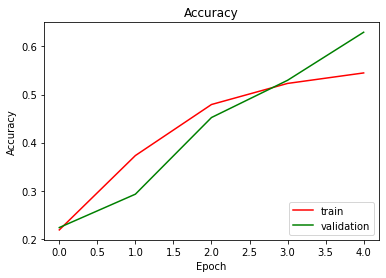

In [34]:
plt.plot(model_history.history['accuracy'],c='red')
plt.plot(model_history.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')